On this page, the code in the link below is used, and we changed the pre-trained neural network type to Xception neural network.
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [ ]:
# load xception model
from keras.applications.xception import Xception
# load the model
model = Xception()
# summarize the model
model.summary()

In [ ]:
# summarize feature map size for each conv layer
from keras.applications.xception import Xception
from matplotlib import pyplot
# load the model
model = Xception()
# summarize feature map shapes
for i in range(len(model.layers)):
 layer = model.layers[i]
 # check for convolutional layer
 if 'conv' not in layer.name:
  continue
 # summarize output shape
 print(i, layer.name, layer.output.shape)

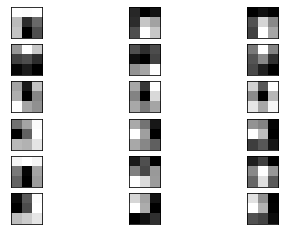

In [ ]:
# cannot easily visualize filters lower down
from keras.applications.xception import Xception
from matplotlib import pyplot
import numpy as np
# load the model
model = Xception()
# retrieve weights from the second hidden layer
filters= model.layers[1].get_weights()
filters = np.reshape(filters,([3,3,3,32]))
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

91884032/91884032 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                      

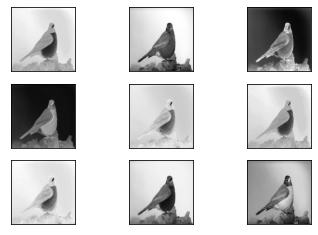

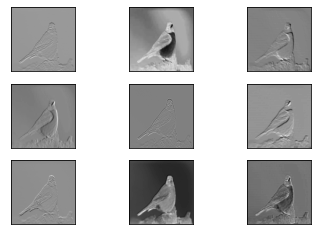

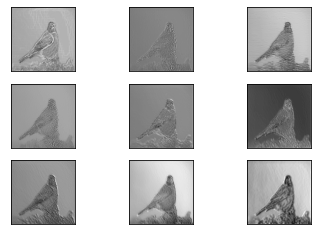

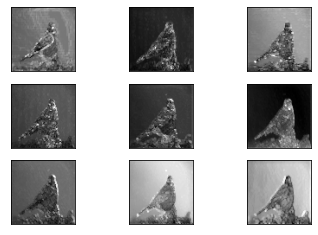

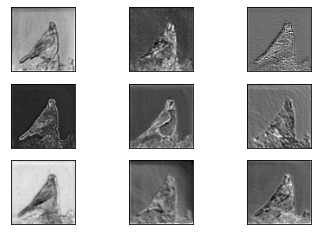

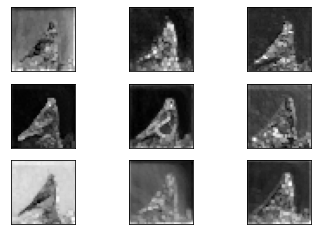

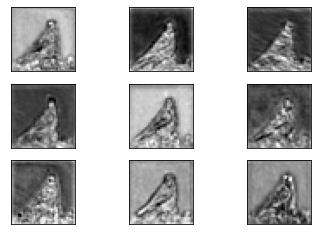

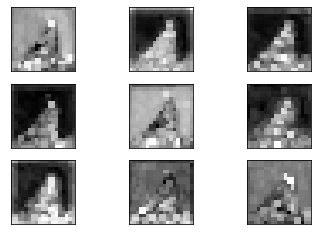

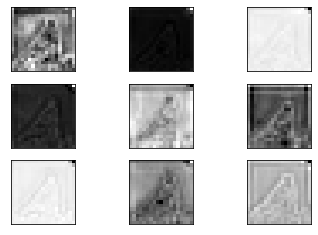

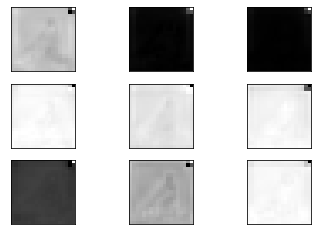

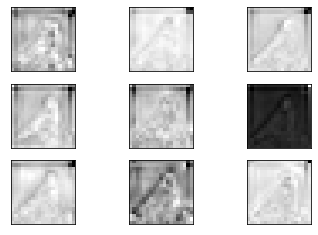

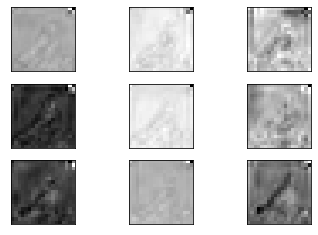

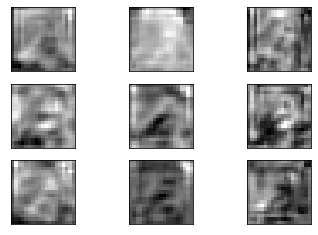

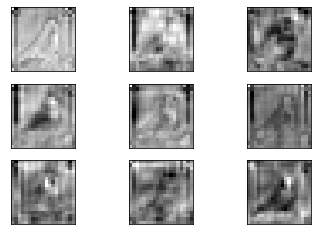

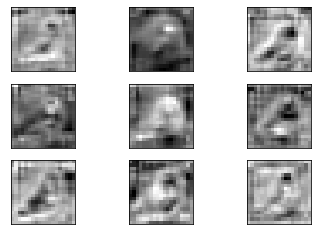

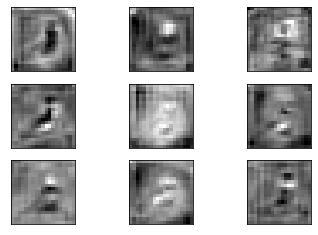

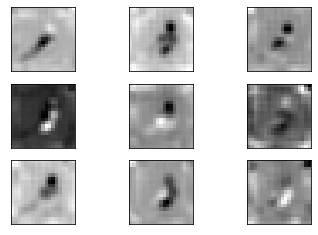

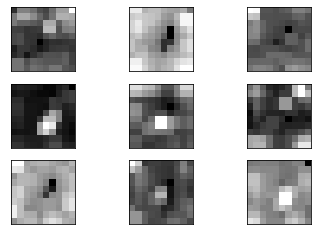

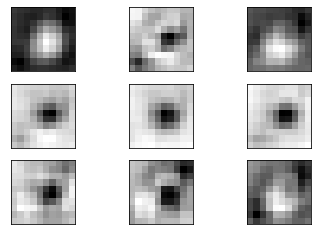

In [ ]:
# plot feature map of first conv layer for given image
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.preprocessing import image
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = Xception()

# redefine model to output right after the first hidden layer
ixs = [1,4 ,10, 12, 20, 22,30, 32, 43, 53, 63, 73, 83, 93, 103, 113,120, 122, 129]
outputs = [model.layers[i+1].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

# load the image with the required shape
img = image.load_img('bird.jpg', target_size=(299, 299))
# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot the output from each block
square = 5
for fmap in feature_maps:
	# plot 25 maps in an 5x5 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()